In [138]:
import pandas as pd
file = 'repetitors_1.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)


In [139]:
df_AP = df.drop(['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink', 'tutorname'], axis=1)

In [140]:
mark_dict = {
    'лучше не бывает!' : 10,
    'отлично' : 9,
    'почти отлично' : 8,
    'вполне хорошо' : 7,
    'хорошо' : 6,
    'почти хорошо' : 5,
    'более-менее' : 4,
    'так себе...' : 3,
    'плохо' : 2,
    'ужасно' : 1
}

In [141]:
df_AP = df_AP.replace({"mark": mark_dict}).dropna()

In [142]:
df_AP.mark *= 10

In [143]:
discipline_dict = {}
index  = 1
for discipline in df_AP['discipline'].unique():
    discipline_dict[discipline] = index
    index += 1

In [144]:
df_AP = df_AP.replace({"discipline": discipline_dict})

In [145]:
from ap import AffinityPropagation
x = df_AP.to_numpy()[::1000]
labels = AffinityPropagation(x, 200, 0.5)

In [146]:
def normalize_labels(labels):
    count = 1
    new_labels = []
    dict_labels = {}
    for lab in labels:
        if lab not in dict_labels:
            dict_labels[lab] = count
            count += 1
        new_labels.append(dict_labels[lab])
    return new_labels

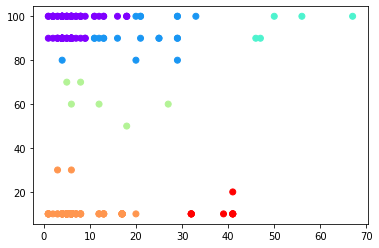

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], cmap='rainbow', c=normalize_labels(labels))
plt.show()

In [148]:
labels

array([ 49,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49,
       102,  49,  49,  49,  17,  49,  49,  49,  49,  49,  49,  49,  49,
       102,  49, 102,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49,
       102,  49,  49,  17,  49,  49,  49,  49,  17,  49,  49,  49,  49,
       102, 102,  49,  49,  49, 102,  49,  49,  49,  49,  49,  49, 102,
       102,  49,  49,  49,  49, 102,  49,  49,  17,  49, 102,  49,  49,
       102, 102,  49, 102,  49,  49,  49, 102, 102,  49,  49,  49,  49,
        17,  49,  49,  49,  49,  49,  49,  49,  49,  49,  49, 102,  49,
        49,  49,  49,  49,  49, 283, 283, 119, 119, 119, 119, 115, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 119, 115, 115, 115, 115, 119, 119, 119, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 11

In [149]:
df_extra = df.drop(['Column1', 'author', 'date', 'id', 'reply', 'tutorlink', 'tutorname'], axis=1).dropna()

In [150]:
import re

EGE = [0 for i in range(df_extra.shape[0])]
OGE = [0 for i in range(df_extra.shape[0])]

index = -1
for _, row in df_extra.iterrows():
    index += 1
    for word in re.split('[ .,!?]', row.text):
        word_to_check = word.strip(' .,!?').lower()
        if word_to_check == 'егэ':
            EGE[index] = 1
        if word_to_check == 'огэ':
            OGE[index] = 1

In [151]:
df_extra["OGE"] = OGE
df_extra["EGE"] = EGE

In [152]:
df_extra.OGE *= 100
df_extra.EGE *= 100

In [153]:
df_extra = df_extra.replace({"discipline": discipline_dict})
df_extra = df_extra.replace({"mark": mark_dict})
df_extra.mark *= 10

In [156]:
df_extra = df_extra.drop(['text'], axis=1)

In [161]:
x = df_extra.to_numpy()[::100]
labels = AffinityPropagation(x, 200, 0.5)
labels

array([2863,    1,    2, ..., 1095, 1095, 2863])

In [174]:
file_res = "AffinityPropagationRepetitorsResults.csv"

In [206]:
df_res = df[df['mark'].notna() & df['discipline'].notna() & df['text'].notna()][::100]

In [208]:
df_res["labels"] = labels

In [209]:
df_res

,Column1,author,date,discipline,id,mark,reply,text,tutorlink,tutorname,labels
0,0.0,Юлия,2019-07-03,биология,3913905.0,лучше не бывает!,NaN,Очень грамотный и приятный преподаватель ) оче...,https://repetitors.info/repetitor/?p=SuhorukovaNA,Сухорукова Наталия Альбертовна,2863
100,100.0,Светлана,2019-07-03,литература,3913204.0,лучше не бывает!,NaN,Великолепный преподаватель. Дочь с удовольстви...,https://repetitors.info/repetitor/?p=LobyntsevaEV,Лобынцева Елена Викторовна,1
201,201.0,Ирина,2019-07-03,английский язык,3912435.0,лучше не бывает!,NaN,Плюсы: Преподаватель высокого уровня. Грамотно...,https://repetitors.info/repetitor/?p=Tsygankov...,Цыганкова Наталия Андреевна,2
302,302.0,Нина Юрьевна,2019-07-03,русский язык,3911752.0,лучше не бывает!,NaN,Мария Викторовна отличный репетитор. Занималис...,https://repetitors.info/repetitor/?p=DoroninaMV,Доронина Мария Викторовна,2864
403,403.0,Анастасия,2019-07-03,английский язык,3911176.0,лучше не бывает!,NaN,2 года готовилась к ЕГЭ много перепробовала ре...,https://repetitors.info/repetitor/?p=HarlamovaEA6,Харламова Елена Алексеевна,4
...,...,...,...,...,...,...,...,...,...,...,...
288226,2553.0,Татьяна (отзыв зафиксирован со слов клиента по...,2014-08-18,английский язык,254895.0,почти отлично,NaN,"Специалист полностью устраивал моего сына, они...",https://repetitors.info/repetitor/?p=MillerHill,Hill Miller,1095
288326,2653.0,Скрипко Ирина (отзыв зафиксирован со слов клие...,2014-07-31,химия,242544.0,почти отлично,NaN,"Андрей приехал к нам только один раз, а потом ...",https://repetitors.info/repetitor/?p=FedoseevAN,Федосеев Андрей Николаевич,1095
288426,2753.0,Анна Пугаченко (отзыв зафиксирован со слов кли...,2014-06-30,испанский язык,165096.0,почти отлично,NaN,"Алина Александровна - пунктуальная, общительна...",https://repetitors.info/repetitor/?p=ZhigarevaAA,Жигарева Алина Александровна,1095
288526,2853.0,Елена (отзыв зафиксирован со слов клиента по т...,2014-04-17,начальная школа,116789.0,почти отлично,NaN,Пусть прозанимались с этим репетитором недолго...,https://repetitors.info/repetitor/?p=LalaevaSI,Лалаева Снежана Игоревна,1095


In [210]:
df_res.to_csv(file_res)